# Homework 1
## Exercise 1

### Task 1.A

In [106]:
!pip3 install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable


now, we load the data to countries_data from the [AIT Moodle](https://24spring.web-tools.hu/course/view.php?id=9)

In [107]:
f = open("./Data/countries.csv", 'r')
countries_data = pd.read_csv(f)

Now, we load Income Per Person data from [Gapminder](https://www.gapminder.org/data/) "GDP/capita (US$, inflation-adjusted)" and "Life expectancy, at birth"

In [113]:
income_data = pd.read_csv(open("./Data/gdppercapita_us_inflation_adjusted.csv", 'r'))
life_expectancy_data = pd.read_csv(open("./Data/lex.csv", 'r'))

### Task 1.B

first import necessary libraries as demonstrated in Lab1 in class (source: personal notes)

In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now let's write a function to plot the histogram. Firstly, we analyze the data in the csv file visually and see that not all numbers are in number format, so we first convert all of them to the correct format.

In [114]:
def convert_to_numbers(df):
    new_df = df.copy()
    for column_name in new_df.columns[1:]:
        new_df[column_name] = df[column_name]
        new_df["contains_k"] = new_df[column_name].str.contains("k") == True
        new_df[column_name] = new_df[column_name].str.replace("k", "").astype(float)
        new_df[column_name] = np.where(new_df.contains_k == True, new_df[column_name]*1000, new_df[column_name])
        new_df.drop("contains_k", axis=1, inplace=True)
    return new_df


In [119]:
income_data = convert_to_numbers(income_data)

Now we can simply plot the numbers

In [122]:
def plot_income_per_year_hist(year):

    # Select the income data for the current year
    year = str(year)
    income_year = income_data[year].dropna()

    # Plot the histogram
    plt.hist(income_year, bins=10, color='red')
    plt.title(f'Income Distribution - {year}')
    plt.xlabel('Income per Capita')
    plt.ylabel('Frequency')
    plt.show()

Let's see the histograms of different years

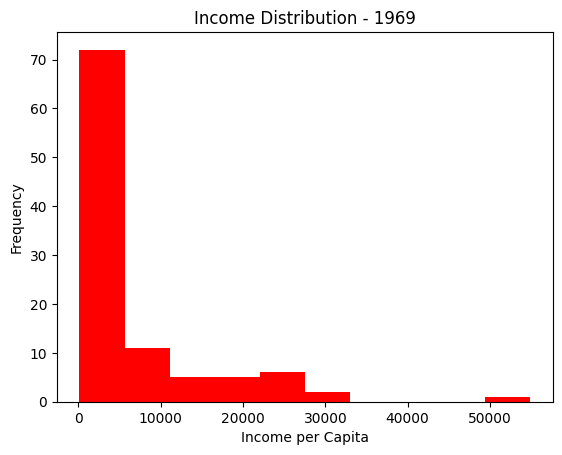

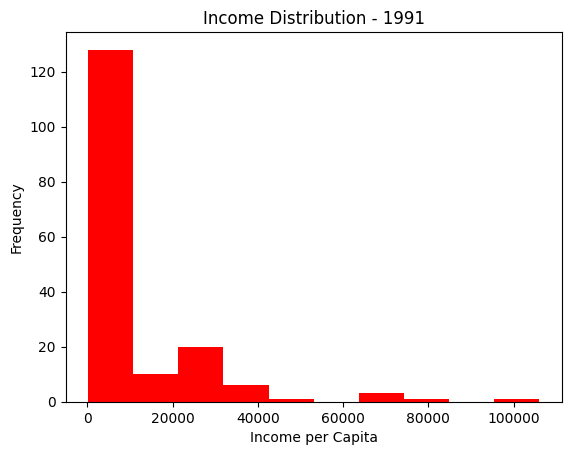

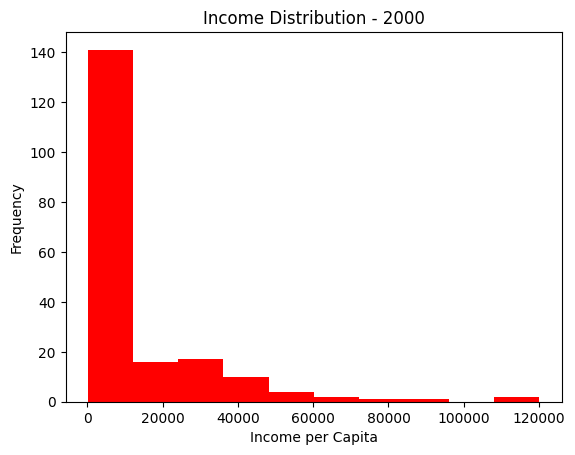

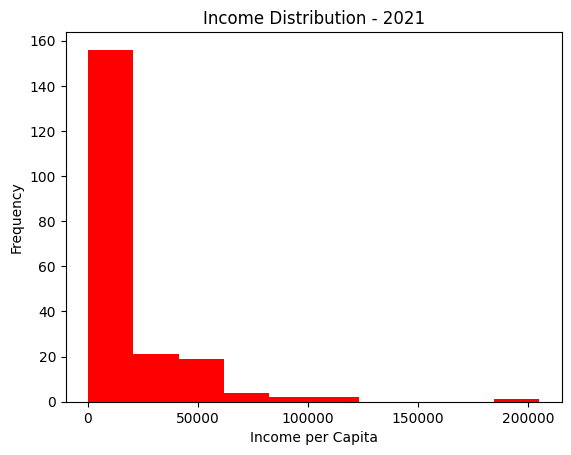

In [123]:
plot_income_per_year_hist(1969)
plot_income_per_year_hist(1991)
plot_income_per_year_hist(2000)
plot_income_per_year_hist(2021)


#### Income distribution
We can see that the income distribution has stably been uneven between the countries over the century. However, the trends show historical growth in 40-80 percentiles - in 1961 less countries were in these percentiles than in 2000 or 2021.

#### Income change
As for the growth, we see that the overall IpC has doubled in the time period of 1961-2021

### Task 1.C

First we visually check the data and see differcency in the name of the "Country" column, so we first standartize the column name. Then we pairwise merge the three dataframes as shown in [Merging dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [130]:
def merge_dataframes(countries_data, income_data, life_expectancy_data):
    # lex_data = life_expectancy_data.astype(float,errors='ignore')
    income_data.rename(columns={'country': 'Country'}, inplace=True)
    life_expectancy_data.rename(columns={'country': 'Country'}, inplace=True)
    return pd.merge(countries_data, income_data, on='Country').merge(life_expectancy_data, on='Country', suffixes=("_income", '_lex'))

### Task 1.D

First, we call the merge_dataframes from Task 1.C

In [135]:
merged_data = merge_dataframes(countries_data, income_data, life_expectancy_data)

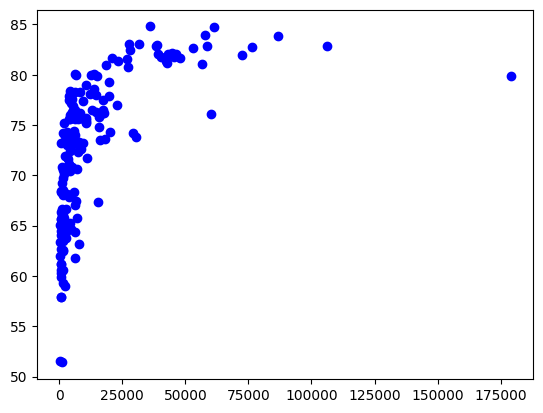

In [136]:
plt.scatter(merged_data['2018_income'], merged_data['2018_lex'], color='blue')

## Works Cited
[Markdown basics](https://www.markdownguide.org/basic-syntax/)

[Merging dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)